# Student’s Academic Performance Analysis
### Panagiotis Maroulidis A.M.: 37
### Georgina Skraparli A.M.: 31

## Analysis

**Paper used:** Amrieh, E. A., Hamtini, T., & Aljarah, I. (2016). Mining Educational Data to Predict Student’s academic Performance using Ensemble Methods. International Journal of Database Theory and Application, 9(8), 119-136.

**Dataset:** datasets_436_920_xAPI-Edu-Data.csv (https://www.kaggle.com/aljarah/xAPI-Edu-Data)

In this paper, there is a proposal about a new student’s performance prediction model based on data mining techniques with the 10 filter-based highest ranked features in which new data attributes/features were included that are called student’s behavioral features (student's and parents' interaction with e-learning management system). The classifiers that were used are: Artificial Neural Network, Naïve Bayesian and Decision tree with ensemble methods (Bagging, Boosting and Random Forest (RF)). According to the paper's results there is a strong relationship between learner’s behaviors and their academic achievement.

There aren't any missing values in the dataset.

In the following analysis we used the following techniques:
- **Logistic Regression** with student’s behavioral features to classify student's academic achievement
- **Support Vector Machine** with student’s behavioral features to classify student's academic achievement
- **Decision Tree** with student’s behavioral features to classify student's academic achievement
- **Decision Tree with Boosting (Adaboost)** with student’s behavioral features to classify student's academic achievement

**Import libraries**

In [212]:
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Read file**

In [213]:
# Read from file
df = pd.read_csv("datasets_436_920_xAPI-Edu-Data.csv") 

**Convert categorical data to numbers**  
<br/>(student’s behavioral features & student's academic achievement)

In [214]:
# Parent School Satisfaction- the Degree of parent satisfaction from school(nominal:’Bad’,’Good’)
df = df.replace({'ParentschoolSatisfaction': {'Bad': 0, 'Good': 1}})

#  Parent Answering Survey- parent answered the surveys which are provided from school or not
# (nominal:’Yes’,’No’)
df = df.replace({'ParentAnsweringSurvey': {'No': 0, 'Yes': 1}})

# Class- student's academic achievement (nominal: L, M, H)
df = df.replace({'Class': {'L': 0, 'M': 1, 'H': 2}})


**Data normalization**
<br/>(student’s behavioral features that need normalization)

In [215]:
# Normalize function
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm

# Behavioral features
df['Discussion']= normalize(df['Discussion'])
df['VisITedResources'] = normalize(df['VisITedResources'])
df['raisedhands'] = normalize(df['raisedhands'])
df['AnnouncementsView'] = normalize(df['AnnouncementsView'])

**Create training and feature**

In [216]:
feature_cols = ['Discussion','VisITedResources', 'raisedhands', 'AnnouncementsView', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction']
X = df[feature_cols]
y = df['Class']

**Split data**

In [247]:
#By default, the test_size is 25% and train_size is 75%
X_train, X_test, y_train, y_test = train_test_split(X,y) 

## Logistic Regression
Classification using Logistic Regression with Multinomial distribution to predict student's academic achievement from student’s behavioral features

In [248]:
# We assumed that the data ara balanced and used Logistic Regression without weights
clf = LogisticRegression(random_state=0, multi_class = 'multinomial', 
                         solver = 'saga', penalty = 'elasticnet', l1_ratio=0.3)
clf.fit(X_train, y_train)
predict = clf.predict(X_test)
predict_train = clf.predict(X_train)
# Evaluation Measures
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="macro"))    
print("Precision test: ",precision_score(y_test, predict, average="macro"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="macro"))
print("F1-measure test: ",f1_score(y_test, predict, average="macro"))


Accuracy test:  0.6416666666666667
Recall test:  0.6541429475015813
Precision test:  0.642094017094017
F1-measure train:  0.6848066358326276
F1-measure test:  0.6464336488049698


In [219]:
ddf = pd.read_csv("datasets_436_920_xAPI-Edu-Data.csv")
ddf["Class"]
from collections import Counter
class_count = Counter(ddf['Class'])

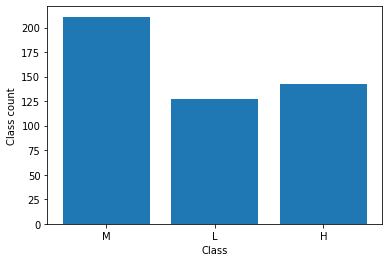

In [220]:
# Barchart
plt.bar(class_count.keys(),class_count.values()) 
plt.xlabel('Class') 
plt.ylabel('Class count') 
plt.show()

**We observed that the student's academic achievement are a bit imbalanced so we will try to put weights on the classes**

In [249]:
# Softmax
sftm = (np.exp(211/480)+np.exp(127/480)+np.exp(142/480))
# Use weights or not (balanced)
# Normalized X data
# penalty = 'elasticnet' is l1 and l2 regularization
# Steps:
# 1: Tried without weights, 
# 2: Then use weights and test accuracy was higher. We chose to have weights because of the imbalanced dataset
# 3: We observed that there is a gap between train and test accuracy which indicates overfitting. Thus we chose to use 
#    elasticnet regularization which is l1 and l2 combined.
clf = LogisticRegression(random_state=0, multi_class = 'multinomial', solver = 'saga', penalty = 'elasticnet', l1_ratio=0.3,
                         class_weight = {1: np.exp(211/480)/sftm, 0: np.exp(127/480)/sftm, 2: np.exp(142/480)/sftm})

clf.fit(X_train, y_train)
predict = clf.predict(X_test)
predict_train = clf.predict(X_train)

# Evaluation Measures
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="macro"))    
print("Precision test: ",precision_score(y_test, predict, average="macro"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="macro"))
print("F1-measure test: ",f1_score(y_test, predict, average="macro"))
# We reduced the gap between training and test accuracy and same for f1-measure
# Using weights the algorithm does not overfit that much


Accuracy test:  0.6583333333333333
Recall test:  0.6438042665746649
Precision test:  0.6848882522372657
F1-measure train:  0.6605133347339425
F1-measure test:  0.6462981909316583


## Support Vector Machine
Support Vector Machine with student’s behavioral features to classify student's academic achievement

In [250]:
# Support Vector Machine convex optimization function, it will find global minimum
# Compared linear, 3rd degree polynomial and rbf which uses Gaussian distributions and C which is the
# regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly 
# positive. The penalty is a squared l2 penalty.

parameters = {'C': np.arange(0.1,1.0,0.1),'kernel': ['linear', 'poly', 'rbf']}
# Using GridSearchCV for optimizing parameters
clf = GridSearchCV(SVC(), parameters, cv=5,n_jobs = -1, iid = False)

clf.fit(X_train, y_train)
predict = clf.predict(X_test)
predict_train = clf.predict(X_train)
# Evaluation Measures
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="macro"))    
print("Precision test: ",precision_score(y_test, predict, average="macro"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="macro"))
print("F1-measure test: ",f1_score(y_test, predict, average="macro"))
print ("Τhe optimized parameters with 5- fold cross validation are:", clf.best_params_) 


Accuracy test:  0.7083333333333334
Recall test:  0.7185498246219307
Precision test:  0.708244301994302
F1-measure train:  0.6503772680243268
F1-measure test:  0.7116090462442813
Τhe optimized parameters with 5- fold cross validation are: {'C': 0.6, 'kernel': 'rbf'}


## Random Forest

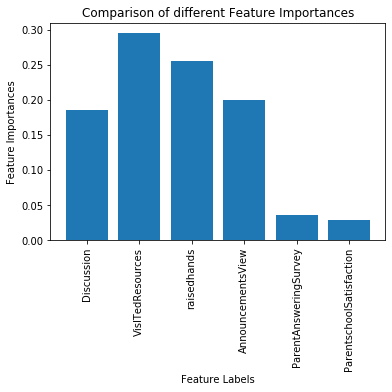

In [251]:
# We used RandomForestClassifier to see the importance of each feature.
# It uses information gain to show how much information each feature has.
# Belongs to bugging ensemble algorithm. Bugging + decision tree. It uses as weak classifiers the decision trees
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
feature_importance = clf.feature_importances_
plt.bar(X_train.columns, feature_importance) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances')
plt.xticks(rotation=90)
plt.title('Comparison of different Feature Importances') 
plt.show() 

## Decision Tree
Decision tree with student’s behavioral features to classify student's academic achievement

**Decision Tree**

In [252]:
parameters = {'max_depth':range(3,20)}
# Using GridSearchCV for optimizing parameters
clf = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5, error_score=np.nan, iid=False)
clf.fit(X_train, y_train)
tree_model = clf.best_estimator_
print ("Mean cross-validated score of the best_estimator:",clf.best_score_)
print ("Τhe optimized maximum depth of the tree with 5- fold cross validation:", clf.best_params_) 

Mean cross-validated score of the best_estimator: 0.6419754261303556
Τhe optimized maximum depth of the tree with 5- fold cross validation: {'max_depth': 8}


**Evaluation Measures**

In [253]:
predict = clf.predict(X_test)
predict_train = clf.predict(X_train)
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="macro"))    
print("Precision test: ",precision_score(y_test, predict, average="macro"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="macro"))
print("F1-measure test: ",f1_score(y_test, predict, average="macro"))

Accuracy test:  0.6
Recall test:  0.6106606865620149
Precision test:  0.6
F1-measure train:  0.8947812516008548
F1-measure test:  0.6034137181678165


**Tree model image**

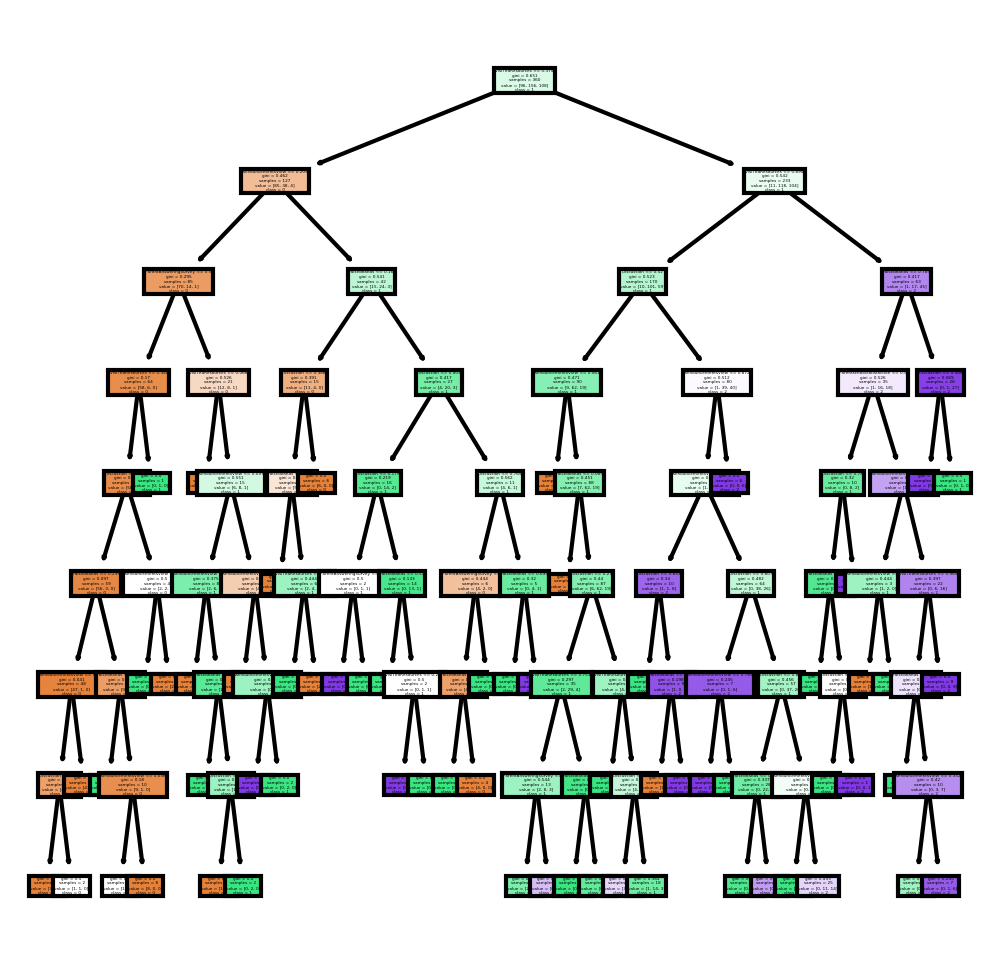

In [254]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_model,
               feature_names = feature_cols, 
               class_names= ['0', '1','2'],
               filled = True);
fig.savefig('SimpleDT.png')

**Decision Tree with Boosting (Adaboost)** 

In [255]:
# Belongs to boosting ensemble methods.
# n_estimators = number of trees as a weak classifier
# learning rate : shrinks the contribution of each weak classifier by learning_rate

parameters = {'n_estimators':range(100,200,10),'learning_rate':np.arange(0.1,1.0,0.1)}
# Using GridSearchCV for optimizing parameters
clf = GridSearchCV(AdaBoostClassifier(base_estimator= tree_model), parameters, cv=5,n_jobs = -1, iid = False)

clf.fit(X_train, y_train)

print ("Mean cross-validated score of the best_estimator:",clf.best_score_)
print ("Τhe parameters with 5- fold cross validation are:", clf.best_params_) 

Mean cross-validated score of the best_estimator: 0.6772511948568287
Τhe parameters with 5- fold cross validation are: {'learning_rate': 0.2, 'n_estimators': 120}


**Evaluation Measures**

In [256]:
predict = clf.predict(X_test)
predict_train = clf.predict(X_train)
print("Accuracy test: ",accuracy_score(y_test, predict))
print("Recall test: ",recall_score(y_test, predict, average="macro"))    
print("Precision test: ",precision_score(y_test, predict, average="macro"))
print("F1-measure train: ",f1_score(y_train, predict_train, average="macro"))
print("F1-measure test: ",f1_score(y_test, predict, average="macro"))

Accuracy test:  0.6583333333333333
Recall test:  0.6465470645736301
Precision test:  0.6739189928845102
F1-measure train:  0.9947768281101613
F1-measure test:  0.6572504708097929


## PCA

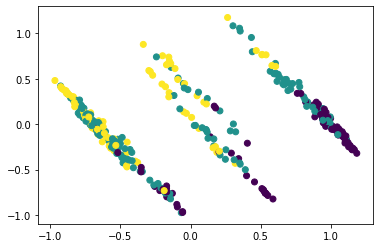

In [257]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
plt.scatter(x = principalComponents[:,0],y = principalComponents[:,1],c = y_train)

With a quick look using PCA with 2 components we can see that some of the points cannot be distinguised between two of the three classes. Some observations overlap with each other.

## Final Conclusions

**Classificasion Method Accuracy:**
<br/>

<table style="width:80%">
<tr>
<th>LR(without weights)</th>
<th>LR(with weights)</th>
<th>SVM</th>
<th>DT</th>
<th>DT(Adaboost)</th>
</tr>

<tr>
<td>64.2%</td>
<td>65.8%</td>
<td>70.8%</td>
<td>60%</td>
<td>65.8%</td>
</tr>
</table>
* LR: Logistic Regression <br/>
* SVM: Support Vector Machine <br/>
* DT: Decidion Tree <br/>

- The highest accuracy was reached with SVM (70.8%).

- From PCA's scatterplot we can see that some observations overlap with each other so this prevents the classifiers to reach higher accuracy.

- The results of all of the above classifications' evaluation measures, in which only the student’s behavioral features are used, are better than using the 10 highest ranked features without behavioral features and worse than using all of the 10 highest ranked features as presented in the paper, except SVM which reaches better accuracy than Naive Bayes's accuracy.
<br/>Paper's results:
 <img src="BF-WBF.png" width ="700" height=600 > 

<br/>
- No one of the above classifiers can reach the classifiers with ensemble methods' accuracy from paper, except SVM that has better results than Naive Bayes with Bagging's results from paper.
<br/>Paper's results:
 <img src="ensembleM.png" width ="700" height=600 > 